In [41]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

print( cv2.__version__)

4.7.0


In [42]:


# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [43]:
def produce_cube_points(x, z):
    y = 1.3
    A = np.array([[x, y, z],
                  [x, y -  6., z],
                  [x - 6., y -  6., z],
                  [x - 6., y, z],
                  [x, y, z + 6.],
                  [x, y -  6., z + 6.],
                  [x - 6., y -  6., z + 6.],
                  [x - 6., y, z + 6.]])
    return A

def changeCoordinates(point, movement):
    angle = - movement[2]
    x_translation = - movement[0]
    z_translation = - movement[1]
    Rxz = np.array([[np.cos(angle), 0, -np.sin(angle)],
                    [0, 1, 0],
                    [np.sin(angle), 0, np.cos(angle)]])

    # Apply the rotation matrix to point P
    point_rotated = np.dot(Rxz, point)

    # Translate the coordinates of P by x and z
    return point_rotated + np.array([x_translation, 0, z_translation])

def points_with_movement(x, z, movement):
    A = produce_cube_points(x, z)
    for i in range(len(A)):
        A[i] = changeCoordinates(A[i], movement)
    return A

In [44]:
RELATIVE_PATH_CUBE = './*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

points3dOnCube = np.array([produce_cube_points(26., 100.),
                          points_with_movement(26., 100., [0.,-np.sin(10 * np.pi/180) * 17.4 * 2, np.pi / 9]),
                          points_with_movement(26., 100., [- 0.0427171547, 0.0567852171, - np.pi / 9])
                          ])


3


points3dOnCube1:   [[ 26.    1.3 100. ]
 [ 26.   -4.7 100. ]
 [ 20.   -4.7 100. ]
 [ 20.    1.3 100. ]
 [ 26.    1.3 106. ]
 [ 26.   -4.7 106. ]
 [ 20.   -4.7 106. ]
 [ 20.    1.3 106. ]]
point_2d:   [[[899 369]]

 [[899 314]]

 [[843 314]]

 [[843 369]]

 [[886 369]]

 [[886 316]]

 [[832 316]]

 [[832 369]]]


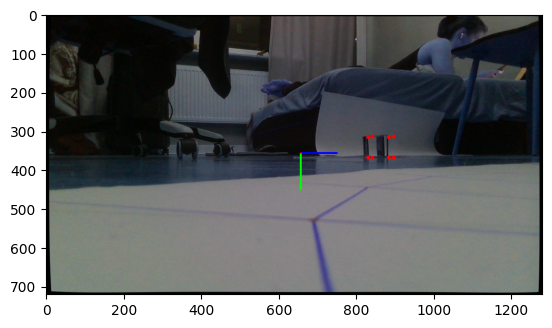

points3dOnCube1:   [[58.63402247  1.3        91.11969493]
 [58.63402247 -4.7        91.11969493]
 [52.99586675 -4.7        93.17181579]
 [52.99586675  1.3        93.17181579]
 [60.68614333  1.3        96.75785066]
 [60.68614333 -4.7        96.75785066]
 [55.04798761 -4.7        98.80997152]
 [55.04798761  1.3        98.80997152]]
point_2d:   [[[1257  371]]

 [[1257  309]]

 [[1189  310]]

 [[1189  370]]

 [[1243  370]]

 [[1243  312]]

 [[1178  313]]

 [[1178  370]]]


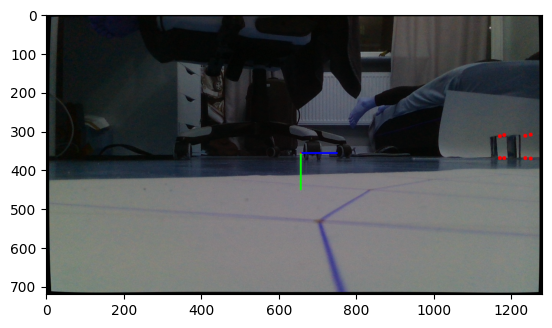

points3dOnCube1:   [[ -9.72728904   1.3        102.80500059]
 [ -9.72728904  -4.7        102.80500059]
 [-15.36544476  -4.7        100.75287973]
 [-15.36544476   1.3        100.75287973]
 [-11.7794099    1.3        108.44315631]
 [-11.7794099   -4.7        108.44315631]
 [-17.41756562  -4.7        106.39103545]
 [-17.41756562   1.3        106.39103545]]
point_2d:   [[[570 369]]

 [[570 315]]

 [[516 314]]

 [[516 369]]

 [[557 368]]

 [[557 317]]

 [[505 317]]

 [[505 369]]]


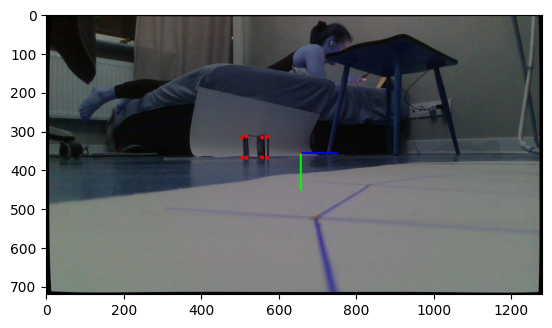

In [45]:
count = 0
for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        img = cv2.imread(images_cube[i])
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        
        print("points3dOnCube1:  ", points3dOnCube1)
        print("point_2d:  ", point_2d)
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
    
        for x, y in point_2d[:,0,:]:
            img = cv2.circle(img, (x, y), radius=5, color=(255,0,0), thickness=-1)
            i += 1

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1